In [2]:
import yfinance as yf
import ta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = yf.Ticker("NKE")

nke_df = pd.DataFrame(data.history(period='max'))
nke_df_filtered = nke_df[nke_df.index >= '2020-01-01']
nke_df_filtered['Log Return'] = np.log(nke_df_filtered['Close'] / nke_df_filtered['Close'].shift(1))
nke_df_filtered.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Return
Date,,,,,,,,
2020-01-02 00:00:00-05:00,95.212922,96.011372,94.893538,96.001976,5644100,0.0,0.0,NaN
2020-01-03 00:00:00-05:00,94.489618,95.814110,94.226600,95.738960,4541800,0.0,0.0,-0.002743
2020-01-06 00:00:00-05:00,94.827783,95.663807,94.752640,95.654419,4612400,0.0,0.0,-0.000883


In [17]:
nke_df_filtered.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Return
Date,,,,,,,,
2025-03-03 00:00:00-05:00,79.989998,80.959999,77.889999,78.410004,8628800,0.4,0.0,-0.007876
2025-03-04 00:00:00-05:00,77.699997,78.650002,76.779999,77.320000,10034100,0.0,0.0,-0.013999
2025-03-05 00:00:00-05:00,77.330002,78.309998,76.459999,77.809998,9853600,0.0,0.0,0.006317
2025-03-06 00:00:00-05:00,76.739998,78.330002,76.739998,77.709999,9623700,0.0,0.0,-0.001286
2025-03-07 00:00:00-05:00,77.480003,79.000000,76.970001,78.589996,9294300,0.0,0.0,0.011260
2025-03-10 00:00:00-04:00,77.510002,80.190002,76.059998,76.400002,15822600,0.0,0.0,-0.028262
2025-03-11 00:00:00-04:00,75.910004,76.080002,73.620003,74.169998,12837000,0.0,0.0,-0.029623
2025-03-12 00:00:00-04:00,74.360001,74.500000,73.230003,73.580002,12304900,0.0,0.0,-0.007986
2025-03-13 00:00:00-04:00,73.180000,73.940002,71.669998,72.639999,10195900,0.0,0.0,-0.012858


In [35]:
mu = nke_df_filtered['Close'].mean()
sigma = nke_df_filtered['Close'].std()
print(mu)
print(sigma)
log_mu = nke_df_filtered['Log Return'].mean()
log_sigma = nke_df_filtered['Log Return'].std()
print(log_mu)
print(log_sigma)


n_simulations = 2
n_steps = 252  # 1 trading year (252 days)
start_price = nke_df_filtered['Close'].iloc[0]
print(start_price)
# mu = 0  # Mean return (0 for pure random walk)
# sigma = 24  # Standard deviation of returns



108.9304485189705
24.067851843068127
-0.00022391731374111912
0.022013036859312947
96.0019760131836


In [71]:
def monte_carlo_simulation(start_price, mu,sigma, n_steps, n_simulations):
    simulations = np.zeros((n_simulations, n_steps))

    for i in range(n_simulations):
        price = start_price
        for j in range(n_steps):
            #random_shock = np.random.normal(mu, sigma)
            random_shock = np.random.normal(0, 2)  # Standard normal distribution
            #print(random_shock)
            price = price + random_shock
            #print(price)
            simulations[i, j] = price
    
    return simulations

def monte_carlo_simulation_take2(start_price, mu,sigma, n_steps, n_simulations):
    simulations = np.zeros((n_simulations, n_steps))

    for i in range(n_simulations):
        price = start_price
        for j in range(n_steps):
            #random_shock = np.random.normal(mu, sigma)
            next_price = np.random.normal(mu, sigma)  # Standard normal distribution
            price = next_price 
            simulations[i, j] = price
    
    return simulations


In [72]:
simulated_prices = monte_carlo_simulation(start_price, mu, sigma, n_steps, n_simulations)
simulated_prices_take2 = monte_carlo_simulation_take2(start_price, mu, sigma, n_steps, n_simulations)

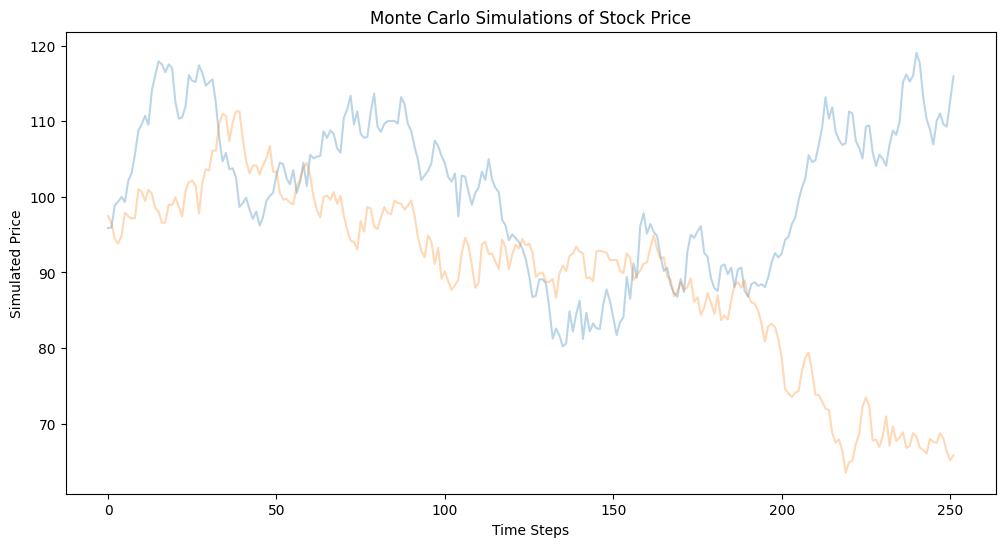

In [73]:
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(simulated_prices[i], alpha=0.3)  # Plot each simulation
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Monte Carlo Simulations of Stock Price")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(simulated_prices[i], alpha=0.3)  # Plot each simulation
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Monte Carlo Simulations of Stock Price Take 2")
plt.show()